In [1]:
import pandas as pd

In [2]:
df1=pd.read_csv('drugsComTrain_raw.csv')
df2=pd.read_csv('drugsComTest_raw.csv')

In [3]:
df1.head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17


In [4]:
df2.head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3


In [5]:
df1.shape,df2.shape

((161297, 7), (53766, 7))

In [6]:
combined = df1.append(df2)
combined.reset_index(inplace=True)

In [7]:
combined.head(3)

,index,uniqueID,drugName,condition,review,rating,date,usefulCount
0,0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17


In [8]:
combined.shape

(215063, 8)

In [9]:
combined.drop(['index'], inplace=True, axis=1)
combined.to_csv('drug reviews combined.csv')

In [10]:
combined.head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17


In [106]:
combined.groupby(['drugName'])['rating'].max()

drugName
A + D Cracked Skin Relief                            10
A / B Otic                                           10
Abacavir / dolutegravir / lamivudine                 10
Abacavir / lamivudine                                10
Abacavir / lamivudine / zidovudine                    9
Abatacept                                            10
Abilify                                              10
Abilify Discmelt                                      9
Abilify Maintena                                     10
Abiraterone                                          10
AbobotulinumtoxinA                                   10
Abraxane                                             10
Abreva                                               10
Absorbine Jr.                                        10
Absorica                                             10
Abstral                                               4
Acamprosate                                          10
Acanya                                 

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
combined['drugName'].value_counts()

Levonorgestrel                                                    4930
Etonogestrel                                                      4421
Ethinyl estradiol / norethindrone                                 3753
Nexplanon                                                         2892
Ethinyl estradiol / norgestimate                                  2790
Ethinyl estradiol / levonorgestrel                                2503
Phentermine                                                       2085
Sertraline                                                        1868
Escitalopram                                                      1747
Mirena                                                            1673
Implanon                                                          1506
Gabapentin                                                        1415
Bupropion                                                         1369
Miconazole                                                        1344
Venlaf

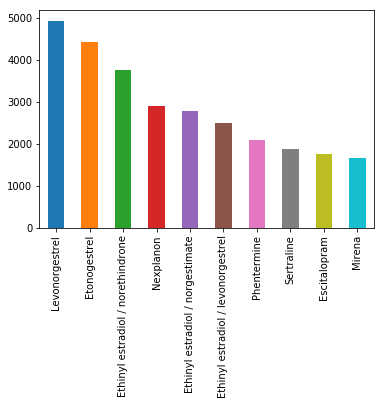

In [15]:
#levonorgestrel is the most drugname used
combined['drugName'].value_counts().head(10).plot.bar();

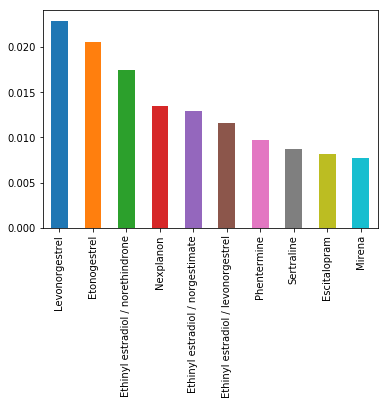

In [45]:
# the percentage of each drugname to all datab
(combined['drugName'].value_counts().head(10) / len(combined)).plot.bar();

In [30]:
combined['rating'].value_counts()

10    68005
9     36708
1     28918
8     25046
7     12547
5     10723
2      9265
3      8718
6      8462
4      6671
Name: rating, dtype: int64

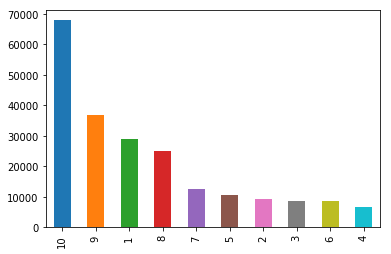

In [14]:
combined['rating'].value_counts().head(10).plot.bar();

In [44]:
combined.groupby(combined['drugName'])['rating'].max().value_counts().sort_values(ascending=False)

10    2924
9      309
8      139
1      103
7       54
5       50
2       25
6       25
3       23
4       19
Name: rating, dtype: int64

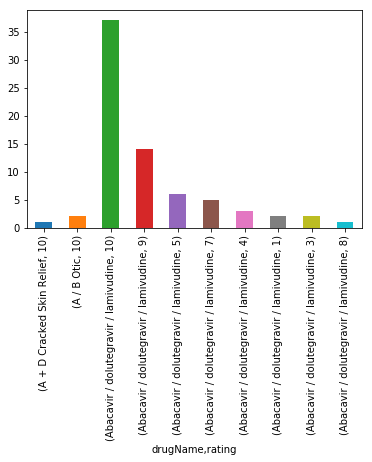

In [28]:
combined.groupby(combined['drugName'])['rating'].value_counts().head(10).plot.bar();